**Name: Mubanga Nsofu** <br>
**Course: BAN6420, Module 6**<br>
**Email: mnsofu@learner.nexford.org** <br>
**Leaner Id: 149050** <br>
**Institution: Nexford University**<br>
**Lecturer: Prof. R. Wanjiku** <br>
**Date: 13th August 2024**
**Task: Classification of Fashion MNIST Dataset**

<br/>
<br/>

## Introduction

In data science, the Fashion MNIST dataset is considered the "hello world" for computer vision, just like the iris dataset is for fundamental statistical analysis. MNIST, short for Modified National Institute of Standards and Technology, is an adapted version of the original dataset developed by the NIST (National Institute of Standards and Technology). To this end, Fashion MNIST is practically an alternative to the handwritten MNIST dataset.

Fashion MNIST utilizes small pictures of various types of clothing. The clothing in the collection is categorized into one of ten groups. Despite having no association with the National Institute of Standards and Technology, Fashion MNIST retained the MNIST name due to its reputation as a database for image recognition.

## Installation

In [ ]:
# Install necessary libraries if not already installed
%pip install  keras
%pip install tensorflow
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

## Import Libraries

In [28]:
# Import the necessary libraries
import numpy as np  # NumPy library for numerical computations
import keras # highlevel API for tensorflow
import tensorflow as tf #  backend for Keras
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # data visualization

from tensorflow.keras.utils import to_categorical # for one hot encoding
from sklearn.metrics import classification_report # for computing additional metrics e.g. precision recall F-Score


print(keras.__version__) # prints keras version

3.4.1
3.4.1


## Set a Seed

In [4]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


## Load the Data Set and Print

In [5]:
# Load the fashion MNIST dataset, its part of the keras API

fmnist_dataset = keras.datasets.fashion_mnist.load_data()



In [ ]:
# Print and examine the dataset
print(fmnist_dataset)


## Split the Data Set into Training and Test Sets

In [7]:
# Split the dataset between train and test sets
# The x_train variable will store the training data i.e. the actual images
# The y_train variable will store the training labels of the actual images
# The x_test variable will store the test data i.e. the actual images 
# The y_test variable will store the test lables of the actual images

# We also print the dimensions of the four variable using the .shape attribute from numpy

(x_train, y_train), (x_test, y_test) = fmnist_dataset

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


The output in the previous cell shows we have 60000 training samples with 28*28. In addition, the y_train has 60000 labelled numbers. We will come back to this in a bit.

## Examine The Data Set

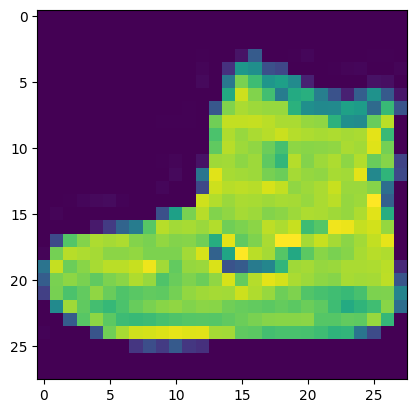

In [10]:
# Let us grab a single image and plot it. We are grabbing the first image from the training set because in Python indexing starts from 0

single_image = x_train[0]


# view the image using matplotlib function imshow (image show), it shows an Ankle boot

plt.imshow(single_image) 





The image above is an ankle boot. Please note that matplotlib is using viridis colour mapping which is color blind friendly by default. So even if the Fashion MNIST data set <br/> is in gray scale, matplotlib defaults to Viridis. Viridis is a color blind friendly palette.

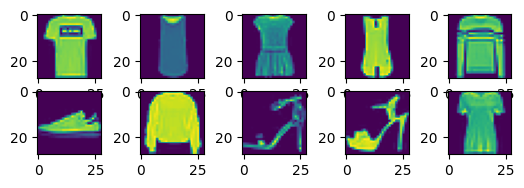

In [8]:
# Alternatively we can look at  10 images in the dataset

for i in range(1,11):
    #Create a 5x5 grid with images
    plt.subplot(5,5,i)
    
    plt.imshow(x_train[i])

plt.show()

In [11]:
# Let us look at the image values. Thus, This line of code is used to examine the raw pixel values of the image stored in the single_image 
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

## Pre Process The Data Set by Scaling It

In [13]:
# From the output above we can see the data is not scaled. Scaling the data is very important as it helps the convolutional neural network (CNN) learn easily
# Scale images to the [0, 1] range

x_train = x_train.astype("float32") / 255 # This line converts from intergers to floats and then scales by 255 because the largest value in the array is 255
x_test = x_test.astype("float32") / 255 # This line converts from intergers to floats and then scales by 255 because the largest value in the array is 255

# Run the code again to check if the data is now scaled and we can see it is from the output below.
single_image = x_train[0]
single_image

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+0

## Reshape the images

In [14]:
# Make sure images have shape (28, 28, 1) using Numpy. This is because, the images are in grey scale so we use 1 (i.e. 1 channel). If the image was in colour there would have been
#  3 channels representing the three primary colours Red, Blue and Yellow, and the shape would have been (28,28,3)

x_train = np.expand_dims(x_train, -1) # Adds a channel dimension to the training data (from (28, 28) to (28, 28, 1)
x_test = np.expand_dims(x_test, -1)   # Adds a channel dimension to the test data (from (28, 28) to (28, 28, 1))
print("x_train shape:", x_train.shape) # Prints the shape of the training data to verify the new dimensions
print("y_train shape:", y_train.shape) # Prints the shape of the training labels to confirm they match the number of samples
print(x_train.shape[0], "train samples") # Prints the number of training samples to ensure the data is correctly loaded
print(x_test.shape[0], "test samples")   # Prints the number of test samples to verify the data is correctly split

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


## Define a List Class for the Labels

In [15]:
# We define a list called class_names which contains the labels of the fashion 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Instantiate a CNN Model and Define the Architecture

In [17]:
model = keras.Sequential([ 
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    # First convolutional layer with 32 filters of size 3x3, using ReLU activation. Input shape is 28x28 pixels with 1 channel.
   
    keras.layers.MaxPooling2D((2, 2)), 
   # First max-pooling layer with a 2x2 pool size, reducing the spatial dimensions of the images by half.

    keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    # Second convolutional layer with 64 filters of size 3x3, using ReLU activation to learn more features, to learn more features of the images 

    keras.layers.MaxPooling2D((2, 2)), 
    # Second max-pooling layer with a 2x2 pool size, further reducing the spatial dimensions, by half.

    keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    # Third convolutional layer with 64 filters of size 3x3, using ReLU activation to capture more complex patterns.
    
    keras.layers.Flatten(),
    # Flattening layer converts the 2D feature maps into a 1D vector, prior feeding it in to the dense fully connected layers.

    keras.layers.Dense(64, activation='relu'), 
    # Fully connected dense layer with 64 units, using ReLU activation for classification.

    keras.layers.Dense(10, activation='softmax') 
    # Output layer with 10 units (one for each class), using softmax activation to output class probabilities.

])


model.summary() 
# Display the CNN model architecture


Model: "sequential"
Model: "sequential"


C:\Users\Mubanga\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)  

 Total params: 93,322 (364.54 KB)
 Total params: 93,322 (364.54 KB)


 Trainable params: 93,322 (364.54 KB)
 Trainable params: 93,322 (364.54 KB)


 Non-trainable params: 0 (0.00 B)
 Non-trainable params: 0 (0.00 B)


There are more than 93K parameters in this model as shown above

## Compile the CNN model

In [19]:
# Compile the model by specifying the optimizer, loss function, and performance metrics

model.compile(optimizer='adam', # Adam optimizer is chosen for its adaptive learning rate capabilities and efficiency
              loss='sparse_categorical_crossentropy', # Sparse Cataegory Crossentropy is an appropriate loss function for multi-class classification with integer labels
              metrics=['accuracy']) # Accuracy metric to evaluate the proportion of correctly predicted instances



## Train the CNN Model

In [20]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,validation_split=0.2)



Epoch 1/10
Epoch 1/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 37:33 2s/step - accuracy: 0.0625 - loss: 2.3026

   8/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0917 - loss: 2.3025 

  16/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0997 - loss: 2.3022

  25/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1048 - loss: 2.3021 

  33/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1062 - loss: 2.3021

  42/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1067 - loss: 2.3021

  51/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1065 - loss: 2.3021

  59/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1060 - loss: 2.3022

  67/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1057 - loss: 2.3022

  76/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1055 - loss: 2.3022

  84/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1056 - loss: 2.3023

  93/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1057 - loss: 2.3023

 101/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1056 - loss: 2.3023

 108/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1055 - loss: 2.3023

 116/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1058 - loss: 2.3023

 125/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1063 - loss: 2.3022

 134/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1068 - loss: 2.3021

 143/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1076 - loss: 2.3019

 152/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1083 - loss: 2.3015

 160/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1091 - loss: 2.3008

 163/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1094 - loss: 2.3005

 170/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1104 - loss: 2.2995

 178/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1117 - loss: 2.2979

 186/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1134 - loss: 2.2957

 194/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1155 - loss: 2.2927

 202/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1178 - loss: 2.2889

 211/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1207 - loss: 2.2837

 219/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1236 - loss: 2.2783

 227/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1266 - loss: 2.2723

 235/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1298 - loss: 2.2656

 244/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1335 - loss: 2.2576

 251/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1365 - loss: 2.2510

 258/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1396 - loss: 2.2442

 267/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1436 - loss: 2.2349

 276/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1477 - loss: 2.2253

 284/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1515 - loss: 2.2165

 292/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1553 - loss: 2.2075

 300/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1591 - loss: 2.1984

 308/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1630 - loss: 2.1892

 316/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1668 - loss: 2.1800

 324/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1707 - loss: 2.1707

 331/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1740 - loss: 2.1626

 339/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1778 - loss: 2.1533

 341/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1788 - loss: 2.1510

 346/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1812 - loss: 2.1451

 353/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1846 - loss: 2.1370

 361/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1884 - loss: 2.1276

 370/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1928 - loss: 2.1171

 378/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1966 - loss: 2.1078

 387/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2008 - loss: 2.0975

 393/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2036 - loss: 2.0906

 400/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2069 - loss: 2.0826

 408/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2105 - loss: 2.0735

 416/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2142 - loss: 2.0644

 423/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2174 - loss: 2.0566

 430/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2205 - loss: 2.0487

 438/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2241 - loss: 2.0398

 446/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2276 - loss: 2.0311

 454/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2310 - loss: 2.0224

 462/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2344 - loss: 2.0139

 470/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2378 - loss: 2.0055

 478/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2411 - loss: 1.9972

 486/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2443 - loss: 1.9889

 494/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2475 - loss: 1.9808

 501/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2503 - loss: 1.9738

 509/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2534 - loss: 1.9659

 517/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2565 - loss: 1.9580

 519/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2572 - loss: 1.9561

 525/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2595 - loss: 1.9503

 531/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2618 - loss: 1.9445

 538/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2644 - loss: 1.9379

 546/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2673 - loss: 1.9304

 554/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2702 - loss: 1.9230

 561/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2727 - loss: 1.9166

 569/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2755 - loss: 1.9094

 577/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2783 - loss: 1.9022

 584/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2808 - loss: 1.8961

 591/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2831 - loss: 1.8900

 598/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2855 - loss: 1.8839

 604/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2875 - loss: 1.8788

 610/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2895 - loss: 1.8737

 618/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2921 - loss: 1.8670

 624/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2941 - loss: 1.8621

 632/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2966 - loss: 1.8555

 640/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2992 - loss: 1.8491

 648/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3017 - loss: 1.8427

 656/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3041 - loss: 1.8364

 662/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3060 - loss: 1.8317

 669/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3081 - loss: 1.8263

 677/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3105 - loss: 1.8202

 679/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3111 - loss: 1.8186

 685/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3129 - loss: 1.8141

 690/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3143 - loss: 1.8104

 698/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3167 - loss: 1.8044

 705/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3187 - loss: 1.7993

 712/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3206 - loss: 1.7942

 720/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3229 - loss: 1.7885

 728/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3251 - loss: 1.7829

 736/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3273 - loss: 1.7773

 744/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3294 - loss: 1.7718

 753/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3318 - loss: 1.7657

 760/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3336 - loss: 1.7609

 768/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3357 - loss: 1.7556

 776/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3378 - loss: 1.7503

 784/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3398 - loss: 1.7451

 791/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3416 - loss: 1.7406

 797/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3431 - loss: 1.7367

 799/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3436 - loss: 1.7355

 805/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3450 - loss: 1.7317

 811/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3465 - loss: 1.7279

 818/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3482 - loss: 1.7235

 826/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3501 - loss: 1.7186

 833/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3518 - loss: 1.7143

 841/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3537 - loss: 1.7095

 848/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3553 - loss: 1.7053

 857/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3574 - loss: 1.7000

 865/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3592 - loss: 1.6953

 871/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3605 - loss: 1.6919

 879/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3623 - loss: 1.6873

 886/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3639 - loss: 1.6834

 893/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3654 - loss: 1.6795

 900/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3669 - loss: 1.6756

 908/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3686 - loss: 1.6712

 915/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3701 - loss: 1.6674

 922/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3716 - loss: 1.6636

 929/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3730 - loss: 1.6599

 936/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3744 - loss: 1.6562

 943/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3759 - loss: 1.6525

 951/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3775 - loss: 1.6484

 958/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3789 - loss: 1.6448

 965/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3803 - loss: 1.6412

 972/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3817 - loss: 1.6376

 974/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3821 - loss: 1.6366

 978/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3828 - loss: 1.6346

 985/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3842 - loss: 1.6311

 993/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3857 - loss: 1.6272

1000/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3870 - loss: 1.6238

1008/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3886 - loss: 1.6199

1016/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3900 - loss: 1.6160

1023/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3913 - loss: 1.6127

1030/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3926 - loss: 1.6094

1038/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3941 - loss: 1.6056

1044/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3951 - loss: 1.6028

1050/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3962 - loss: 1.6001

1057/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3975 - loss: 1.5969

1065/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3989 - loss: 1.5932

1071/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3999 - loss: 1.5905

1078/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4011 - loss: 1.5874

1085/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4023 - loss: 1.5843

1091/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4033 - loss: 1.5817

1098/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4045 - loss: 1.5786

1106/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4059 - loss: 1.5751

1112/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4069 - loss: 1.5726

1119/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4080 - loss: 1.5696

1127/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4093 - loss: 1.5662

1133/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4103 - loss: 1.5637

1135/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4106 - loss: 1.5628

1138/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4111 - loss: 1.5616

1144/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4121 - loss: 1.5591

1150/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4130 - loss: 1.5566

1158/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4143 - loss: 1.5533

1164/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4152 - loss: 1.5509

1169/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4160 - loss: 1.5489

1176/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4171 - loss: 1.5461

1183/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4182 - loss: 1.5433

1191/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4194 - loss: 1.5401

1198/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4204 - loss: 1.5374

1205/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4215 - loss: 1.5346

1212/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4225 - loss: 1.5319

1218/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4234 - loss: 1.5297

1225/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4244 - loss: 1.5270

1232/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4254 - loss: 1.5244

1239/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4264 - loss: 1.5217

1246/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4274 - loss: 1.5191

1254/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4286 - loss: 1.5162

1261/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4296 - loss: 1.5136

1268/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4305 - loss: 1.5111

1275/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4315 - loss: 1.5086

1283/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4326 - loss: 1.5057

1286/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4330 - loss: 1.5047

1290/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4336 - loss: 1.5032

1297/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4345 - loss: 1.5008

1303/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4353 - loss: 1.4987

1310/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4362 - loss: 1.4963

1316/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4370 - loss: 1.4942

1322/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4378 - loss: 1.4921

1329/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4387 - loss: 1.4897

1335/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4395 - loss: 1.4877

1342/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4404 - loss: 1.4854

1349/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4413 - loss: 1.4830

1355/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4421 - loss: 1.4810

1362/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4430 - loss: 1.4787

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4440 - loss: 1.4761

1376/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4447 - loss: 1.4741

1383/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4456 - loss: 1.4719

1390/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4464 - loss: 1.4696

1397/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4473 - loss: 1.4674

1402/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4479 - loss: 1.4658

1409/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4487 - loss: 1.4636

1415/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4495 - loss: 1.4617

1423/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4504 - loss: 1.4593

1429/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4511 - loss: 1.4574

1431/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4513 - loss: 1.4568

1436/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4519 - loss: 1.4553

1442/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4526 - loss: 1.4534

1450/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4536 - loss: 1.4510

1457/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4544 - loss: 1.4489

1464/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4552 - loss: 1.4468

1472/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4561 - loss: 1.4444

1479/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4568 - loss: 1.4424

1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4575 - loss: 1.4406

1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4580 - loss: 1.4394

1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4585 - loss: 1.4380

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4592 - loss: 1.4362

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4593 - loss: 1.4360 - val_accuracy: 0.7352 - val_loss: 0.6869
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4593 - loss: 1.4360 - val_accuracy: 0.7352 - val_loss: 0.6869


Epoch 2/10
Epoch 2/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.6875 - loss: 0.7531

   8/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6924 - loss: 0.8000 

  15/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7080 - loss: 0.7642

  22/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7145 - loss: 0.7497

  25/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7140 - loss: 0.7481

  30/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7143 - loss: 0.7426

  35/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7156 - loss: 0.7367

  41/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7175 - loss: 0.7321

  48/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7182 - loss: 0.7301 

  55/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7180 - loss: 0.7293

  60/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7179 - loss: 0.7285

  67/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7182 - loss: 0.7271

  74/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7188 - loss: 0.7252

  80/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7196 - loss: 0.7232

  85/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7202 - loss: 0.7214

  91/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7208 - loss: 0.7195

  97/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7215 - loss: 0.7177

 103/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7221 - loss: 0.7163

 110/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7229 - loss: 0.7145

 116/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7237 - loss: 0.7130

 123/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7246 - loss: 0.7116

 130/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7252 - loss: 0.7105

 137/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7258 - loss: 0.7096

 143/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7261 - loss: 0.7091

 150/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7264 - loss: 0.7086

 156/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7266 - loss: 0.7081

 160/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7268 - loss: 0.7077

 166/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7270 - loss: 0.7073

 171/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7271 - loss: 0.7072

 173/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7272 - loss: 0.7071

 178/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7273 - loss: 0.7069

 183/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7275 - loss: 0.7067

 188/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7276 - loss: 0.7065

 195/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7278 - loss: 0.7063

 200/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7280 - loss: 0.7061

 207/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7282 - loss: 0.7058

 212/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7283 - loss: 0.7055

 218/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7285 - loss: 0.7052

 225/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7286 - loss: 0.7049

 232/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7287 - loss: 0.7046 

 239/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7288 - loss: 0.7044

 245/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7288 - loss: 0.7041

 252/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7289 - loss: 0.7039

 259/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7289 - loss: 0.7036

 266/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7289 - loss: 0.7034

 273/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7290 - loss: 0.7031

 280/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7290 - loss: 0.7029

 287/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7291 - loss: 0.7027

 293/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7291 - loss: 0.7025

 299/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7291 - loss: 0.7023

 305/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7292 - loss: 0.7021

 312/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7292 - loss: 0.7019

 319/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7293 - loss: 0.7017

 322/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7293 - loss: 0.7017

 324/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7293 - loss: 0.7016

 330/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7293 - loss: 0.7015

 336/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7294 - loss: 0.7014

 343/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7294 - loss: 0.7012

 350/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7295 - loss: 0.7010

 357/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7296 - loss: 0.7009

 364/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7297 - loss: 0.7006

 371/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7298 - loss: 0.7004

 378/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7299 - loss: 0.7002

 384/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7299 - loss: 0.7000

 391/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7300 - loss: 0.6999

 398/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7301 - loss: 0.6996

 404/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7302 - loss: 0.6994 

 411/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7303 - loss: 0.6992

 417/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7304 - loss: 0.6990

 423/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7305 - loss: 0.6987

 429/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7306 - loss: 0.6985

 436/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7307 - loss: 0.6982

 442/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7308 - loss: 0.6980

 449/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7308 - loss: 0.6977

 456/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7309 - loss: 0.6975

 463/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7310 - loss: 0.6973

 470/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7310 - loss: 0.6971

 476/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7311 - loss: 0.6970

 483/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7312 - loss: 0.6968

 488/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7312 - loss: 0.6966

 495/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7313 - loss: 0.6964

 502/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7313 - loss: 0.6963

 505/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7314 - loss: 0.6962

 511/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7314 - loss: 0.6960

 517/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7315 - loss: 0.6959

 523/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7315 - loss: 0.6957

 528/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7316 - loss: 0.6956

 535/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7317 - loss: 0.6954

 541/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7317 - loss: 0.6952

 547/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7318 - loss: 0.6950

 554/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7319 - loss: 0.6949

 561/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7320 - loss: 0.6947

 566/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7320 - loss: 0.6946

 573/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7321 - loss: 0.6944

 580/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7321 - loss: 0.6942

 587/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7322 - loss: 0.6941

 593/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7323 - loss: 0.6939

 600/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7323 - loss: 0.6937

 607/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7324 - loss: 0.6936

 613/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7325 - loss: 0.6934

 620/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7325 - loss: 0.6932

 625/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7326 - loss: 0.6931

 631/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7327 - loss: 0.6930

 637/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7327 - loss: 0.6928

 643/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7328 - loss: 0.6927

 649/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7329 - loss: 0.6925

 656/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7329 - loss: 0.6923

 662/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7330 - loss: 0.6921

 668/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7331 - loss: 0.6920

 674/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7332 - loss: 0.6918

 681/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7332 - loss: 0.6916

 688/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7333 - loss: 0.6914

 695/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7334 - loss: 0.6913

 701/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7335 - loss: 0.6911

 708/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7336 - loss: 0.6909

 713/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7336 - loss: 0.6908

 717/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7337 - loss: 0.6907

 721/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7337 - loss: 0.6906

 727/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7338 - loss: 0.6905

 733/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7338 - loss: 0.6903

 738/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7339 - loss: 0.6902

 744/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7340 - loss: 0.6901

 751/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7340 - loss: 0.6899

 755/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7341 - loss: 0.6898

 761/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7341 - loss: 0.6897

 768/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7342 - loss: 0.6895

 775/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7343 - loss: 0.6893

 781/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7344 - loss: 0.6892

 787/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7344 - loss: 0.6890

 793/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7345 - loss: 0.6889

 800/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7346 - loss: 0.6887

 808/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7347 - loss: 0.6885

 815/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7348 - loss: 0.6883

 821/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7348 - loss: 0.6882

 828/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7349 - loss: 0.6880

 835/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7350 - loss: 0.6878

 841/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7351 - loss: 0.6877

 847/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7352 - loss: 0.6875

 854/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7353 - loss: 0.6873

 861/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7354 - loss: 0.6872

 867/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7354 - loss: 0.6870

 871/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7355 - loss: 0.6869

 874/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7355 - loss: 0.6869

 879/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7356 - loss: 0.6868

 885/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7356 - loss: 0.6866

 892/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7357 - loss: 0.6865

 898/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7358 - loss: 0.6863

 903/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7358 - loss: 0.6862

 909/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7359 - loss: 0.6861

 915/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7360 - loss: 0.6860

 921/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7360 - loss: 0.6858

 922/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7361 - loss: 0.6858

 927/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7361 - loss: 0.6857

 931/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7362 - loss: 0.6856

 937/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7362 - loss: 0.6855

 941/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7363 - loss: 0.6854

 946/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7363 - loss: 0.6853

 951/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7364 - loss: 0.6852

 957/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7365 - loss: 0.6851

 962/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7365 - loss: 0.6850

 968/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7366 - loss: 0.6848

 974/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7366 - loss: 0.6847

 979/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7367 - loss: 0.6846

 985/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7368 - loss: 0.6844

 992/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7368 - loss: 0.6843

 997/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7369 - loss: 0.6842

1002/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7369 - loss: 0.6841

1008/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7370 - loss: 0.6839

1014/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7371 - loss: 0.6838

1021/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7372 - loss: 0.6836

1028/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7372 - loss: 0.6835

1033/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7373 - loss: 0.6834

1038/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7373 - loss: 0.6833

1045/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7374 - loss: 0.6831

1052/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7375 - loss: 0.6829

1059/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7376 - loss: 0.6828

1065/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7376 - loss: 0.6826

1072/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7377 - loss: 0.6825

1077/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7378 - loss: 0.6824

1084/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7378 - loss: 0.6822

1090/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7379 - loss: 0.6821

1096/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7380 - loss: 0.6819

1103/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7380 - loss: 0.6818

1109/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7381 - loss: 0.6816

1112/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7381 - loss: 0.6816

1115/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7382 - loss: 0.6815

1119/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7382 - loss: 0.6814

1125/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7383 - loss: 0.6813

1132/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7383 - loss: 0.6811

1139/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7384 - loss: 0.6810

1144/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7385 - loss: 0.6808

1150/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7385 - loss: 0.6807

1157/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7386 - loss: 0.6805

1163/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7387 - loss: 0.6804

1170/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7387 - loss: 0.6802

1176/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7388 - loss: 0.6801

1182/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7389 - loss: 0.6800

1188/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7389 - loss: 0.6798

1195/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7390 - loss: 0.6797

1202/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7391 - loss: 0.6795

1208/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7391 - loss: 0.6794

1214/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7392 - loss: 0.6793

1220/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7393 - loss: 0.6791

1227/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7393 - loss: 0.6790

1234/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7394 - loss: 0.6788

1239/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7394 - loss: 0.6787

1246/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7395 - loss: 0.6786

1253/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7396 - loss: 0.6784

1259/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7396 - loss: 0.6783

1264/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7397 - loss: 0.6782

1270/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7397 - loss: 0.6781

1276/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7398 - loss: 0.6780

1282/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7398 - loss: 0.6779

1288/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7399 - loss: 0.6777

1293/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7399 - loss: 0.6776

1297/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7399 - loss: 0.6776

1302/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7400 - loss: 0.6775

1308/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7400 - loss: 0.6773

1315/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7401 - loss: 0.6772

1317/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7401 - loss: 0.6772

1321/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7402 - loss: 0.6771

1327/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7402 - loss: 0.6770

1332/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7402 - loss: 0.6769

1338/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7403 - loss: 0.6768

1345/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7404 - loss: 0.6766

1350/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7404 - loss: 0.6765

1356/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7404 - loss: 0.6764

1363/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7405 - loss: 0.6763

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7406 - loss: 0.6761

1376/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7406 - loss: 0.6760

1383/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7407 - loss: 0.6759

1389/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7407 - loss: 0.6757

1396/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7408 - loss: 0.6756

1401/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7408 - loss: 0.6755

1407/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7409 - loss: 0.6754

1414/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7409 - loss: 0.6753

1421/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7410 - loss: 0.6751

1427/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7410 - loss: 0.6750

1434/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7411 - loss: 0.6749

1440/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7411 - loss: 0.6748

1447/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7412 - loss: 0.6747

1453/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7412 - loss: 0.6745

1457/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7412 - loss: 0.6745

1464/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7413 - loss: 0.6743

1470/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7413 - loss: 0.6742

1477/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7414 - loss: 0.6741

1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7414 - loss: 0.6740

1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7415 - loss: 0.6738

1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7415 - loss: 0.6737

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7416 - loss: 0.6736 - val_accuracy: 0.7681 - val_loss: 0.6118
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7416 - loss: 0.6736 - val_accuracy: 0.7681 - val_loss: 0.6118


Epoch 3/10
Epoch 3/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 1:06 44ms/step - accuracy: 0.7812 - loss: 0.4751

   8/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7327 - loss: 0.6560  

  14/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7418 - loss: 0.6404

  21/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7529 - loss: 0.6295

  25/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7547 - loss: 0.6306

  32/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7570 - loss: 0.6274

  38/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7589 - loss: 0.6232

  44/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7604 - loss: 0.6210

  50/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7609 - loss: 0.6205

  54/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7613 - loss: 0.6203

  61/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7617 - loss: 0.6198

  63/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7618 - loss: 0.6196

  70/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7623 - loss: 0.6183

  75/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7627 - loss: 0.6169

  78/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7629 - loss: 0.6160

  83/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7633 - loss: 0.6144

  88/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7637 - loss: 0.6128

  93/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7640 - loss: 0.6112

  99/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7645 - loss: 0.6095

 104/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7649 - loss: 0.6081

 110/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7654 - loss: 0.6065

 115/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7658 - loss: 0.6052

 119/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7661 - loss: 0.6043

 125/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7665 - loss: 0.6033

 129/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7667 - loss: 0.6028

 135/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7670 - loss: 0.6020

 142/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7672 - loss: 0.6014

 146/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7673 - loss: 0.6012

 153/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6009

 157/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7674 - loss: 0.6007

 163/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6004

 169/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6003

 174/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6003

 180/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6002

 185/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6002

 192/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6002

 197/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6002

 203/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7674 - loss: 0.6002

 210/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7675 - loss: 0.6000

 217/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7676 - loss: 0.5999

 222/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7676 - loss: 0.5999

 227/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7676 - loss: 0.5998

 230/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7676 - loss: 0.5998

 236/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7676 - loss: 0.5997

 244/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7676 - loss: 0.5996

 252/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7676 - loss: 0.5994

 260/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7676 - loss: 0.5993

 266/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7677 - loss: 0.5992

 274/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7677 - loss: 0.5990

 282/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7677 - loss: 0.5989

 289/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7677 - loss: 0.5988

 297/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7678 - loss: 0.5987

 305/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7678 - loss: 0.5986 

 313/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7678 - loss: 0.5985

 321/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7678 - loss: 0.5985

 329/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7678 - loss: 0.5985

 337/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7679 - loss: 0.5984

 345/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7679 - loss: 0.5983

 351/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7680 - loss: 0.5983

 354/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7680 - loss: 0.5982

 357/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7680 - loss: 0.5982

 365/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7681 - loss: 0.5980

 374/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7681 - loss: 0.5978

 382/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7681 - loss: 0.5977

 390/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7682 - loss: 0.5976

 398/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7682 - loss: 0.5975

 405/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7683 - loss: 0.5973 

 412/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7683 - loss: 0.5972

 420/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7684 - loss: 0.5970

 428/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7685 - loss: 0.5967

 437/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7686 - loss: 0.5965

 445/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7687 - loss: 0.5963

 453/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7688 - loss: 0.5961

 461/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7689 - loss: 0.5960

 469/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7689 - loss: 0.5958

 478/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7690 - loss: 0.5956

 487/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7691 - loss: 0.5954

 495/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7692 - loss: 0.5953

 501/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7693 - loss: 0.5952

 508/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7693 - loss: 0.5950

 516/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7694 - loss: 0.5949

 525/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7695 - loss: 0.5947

 533/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7696 - loss: 0.5946

 541/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7697 - loss: 0.5944

 549/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7698 - loss: 0.5943

 558/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7699 - loss: 0.5941

 566/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7700 - loss: 0.5940

 574/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7701 - loss: 0.5939

 582/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7702 - loss: 0.5937

 590/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7703 - loss: 0.5936

 598/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7704 - loss: 0.5935

 606/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7705 - loss: 0.5933

 614/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7706 - loss: 0.5932

 622/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7707 - loss: 0.5930

 629/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7707 - loss: 0.5929

 632/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7708 - loss: 0.5929

 638/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7708 - loss: 0.5928

 646/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7709 - loss: 0.5926

 655/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7710 - loss: 0.5924

 663/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7711 - loss: 0.5923

 671/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7712 - loss: 0.5921

 679/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7713 - loss: 0.5920

 688/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7715 - loss: 0.5918

 696/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7716 - loss: 0.5916

 704/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7717 - loss: 0.5914

 713/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7718 - loss: 0.5913

 722/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7719 - loss: 0.5911

 730/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7720 - loss: 0.5910

 739/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7721 - loss: 0.5908

 747/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7721 - loss: 0.5907

 756/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7722 - loss: 0.5905

 764/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7723 - loss: 0.5904

 772/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7724 - loss: 0.5903

 775/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7724 - loss: 0.5902

 780/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7725 - loss: 0.5901

 787/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7726 - loss: 0.5900

 795/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7726 - loss: 0.5898

 803/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7727 - loss: 0.5897

 811/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7728 - loss: 0.5895

 819/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7729 - loss: 0.5894

 827/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7730 - loss: 0.5892

 835/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7731 - loss: 0.5891

 841/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7732 - loss: 0.5890

 848/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7732 - loss: 0.5888

 855/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7733 - loss: 0.5887

 862/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7734 - loss: 0.5886

 869/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7735 - loss: 0.5884

 876/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7735 - loss: 0.5883

 883/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7736 - loss: 0.5882

 890/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7737 - loss: 0.5881

 892/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7737 - loss: 0.5880

 897/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7737 - loss: 0.5880

 903/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7738 - loss: 0.5879

 910/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7738 - loss: 0.5878

 918/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7739 - loss: 0.5876

 925/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7740 - loss: 0.5875

 934/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7741 - loss: 0.5874

 942/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7741 - loss: 0.5872

 950/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7742 - loss: 0.5871

 958/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7743 - loss: 0.5870

 965/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7743 - loss: 0.5869

 972/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7744 - loss: 0.5867

 980/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7745 - loss: 0.5866

 988/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7745 - loss: 0.5865

 996/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7746 - loss: 0.5864

1003/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7747 - loss: 0.5862

1006/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7747 - loss: 0.5862

1012/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7747 - loss: 0.5861

1018/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7748 - loss: 0.5860

1026/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7749 - loss: 0.5858

1034/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7749 - loss: 0.5857

1041/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7750 - loss: 0.5856

1049/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7751 - loss: 0.5855

1057/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7752 - loss: 0.5853

1065/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7752 - loss: 0.5852

1073/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7753 - loss: 0.5850

1081/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7754 - loss: 0.5849

1089/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7754 - loss: 0.5848

1097/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7755 - loss: 0.5846

1105/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7756 - loss: 0.5845

1113/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7756 - loss: 0.5844

1121/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7757 - loss: 0.5842

1130/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7758 - loss: 0.5841

1137/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7759 - loss: 0.5840

1144/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7759 - loss: 0.5839

1152/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7760 - loss: 0.5837

1159/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7760 - loss: 0.5836

1168/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7761 - loss: 0.5835

1176/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7762 - loss: 0.5833

1184/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7763 - loss: 0.5832

1192/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7763 - loss: 0.5831

1201/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7764 - loss: 0.5829

1209/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7765 - loss: 0.5828

1216/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7765 - loss: 0.5827

1224/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7766 - loss: 0.5826

1232/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7766 - loss: 0.5825

1240/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7767 - loss: 0.5823

1247/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7767 - loss: 0.5822

1252/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7768 - loss: 0.5822

1258/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7768 - loss: 0.5821

1266/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7769 - loss: 0.5820

1274/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7769 - loss: 0.5819

1282/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7770 - loss: 0.5818

1290/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7770 - loss: 0.5817

1299/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7771 - loss: 0.5815

1306/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7771 - loss: 0.5814

1314/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7772 - loss: 0.5813

1322/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7773 - loss: 0.5812

1331/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7773 - loss: 0.5811

1340/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7774 - loss: 0.5810

1348/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7774 - loss: 0.5809

1356/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7775 - loss: 0.5808

1364/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7775 - loss: 0.5807

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7776 - loss: 0.5806

1374/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7776 - loss: 0.5805

1381/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7777 - loss: 0.5804

1390/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7777 - loss: 0.5803

1398/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7778 - loss: 0.5802

1406/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7778 - loss: 0.5801

1414/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7779 - loss: 0.5800

1422/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7779 - loss: 0.5799

1429/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7780 - loss: 0.5798

1436/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7780 - loss: 0.5797

1444/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7780 - loss: 0.5796

1452/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7781 - loss: 0.5795

1460/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7781 - loss: 0.5794

1468/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7782 - loss: 0.5793

1477/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7782 - loss: 0.5792

1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7783 - loss: 0.5791

1490/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7783 - loss: 0.5791

1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7784 - loss: 0.5790

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7784 - loss: 0.5789 - val_accuracy: 0.7960 - val_loss: 0.5383
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7784 - loss: 0.5789 - val_accuracy: 0.7960 - val_loss: 0.5383


Epoch 4/10
Epoch 4/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 39ms/step - accuracy: 0.8438 - loss: 0.3338

   9/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7843 - loss: 0.5642  

  17/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7915 - loss: 0.5533

  23/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7951 - loss: 0.5523

  28/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7951 - loss: 0.5524

  34/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7959 - loss: 0.5500

  42/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7975 - loss: 0.5476

  50/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7981 - loss: 0.5479

  58/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7985 - loss: 0.5484

  66/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7988 - loss: 0.5483

  74/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7993 - loss: 0.5470

  81/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7999 - loss: 0.5454

  89/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8005 - loss: 0.5433

  97/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8011 - loss: 0.5411

 105/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8016 - loss: 0.5391

 114/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8021 - loss: 0.5370

 122/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8025 - loss: 0.5356

 129/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8028 - loss: 0.5348

 137/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8030 - loss: 0.5341

 140/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8030 - loss: 0.5340

 144/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8030 - loss: 0.5339

 149/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8030 - loss: 0.5338

 157/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8030 - loss: 0.5336

 165/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8028 - loss: 0.5335

 172/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8027 - loss: 0.5336

 180/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8025 - loss: 0.5338

 188/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8024 - loss: 0.5340 

 196/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8023 - loss: 0.5342

 204/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8022 - loss: 0.5343

 213/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8021 - loss: 0.5344

 221/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8020 - loss: 0.5345

 229/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8018 - loss: 0.5346

 237/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8017 - loss: 0.5347

 245/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8016 - loss: 0.5347

 248/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8016 - loss: 0.5347

 251/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8015 - loss: 0.5347

 256/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8015 - loss: 0.5347

 264/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8014 - loss: 0.5346

 271/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8012 - loss: 0.5346

 278/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8012 - loss: 0.5345

 286/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8011 - loss: 0.5345

 294/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8010 - loss: 0.5345

 302/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8009 - loss: 0.5345

 310/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8008 - loss: 0.5345

 317/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8007 - loss: 0.5346

 325/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8006 - loss: 0.5346

 333/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8005 - loss: 0.5346

 340/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8005 - loss: 0.5346

 347/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8005 - loss: 0.5346

 355/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8004 - loss: 0.5346

 362/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8004 - loss: 0.5345

 368/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8004 - loss: 0.5344

 376/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8004 - loss: 0.5343

 383/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8003 - loss: 0.5343

 390/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8003 - loss: 0.5343

 397/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8002 - loss: 0.5342

 404/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8002 - loss: 0.5341

 412/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8002 - loss: 0.5340

 420/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8002 - loss: 0.5339

 427/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8002 - loss: 0.5338

 434/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8002 - loss: 0.5336

 441/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8001 - loss: 0.5335

 449/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5334

 456/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5333

 463/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5332

 465/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5332

 471/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5331

 476/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5330

 484/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8001 - loss: 0.5329

 491/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8002 - loss: 0.5328

 498/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8002 - loss: 0.5327

 506/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8002 - loss: 0.5327

 513/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8002 - loss: 0.5326

 520/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8003 - loss: 0.5325

 527/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8003 - loss: 0.5324

 533/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8003 - loss: 0.5324

 540/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8004 - loss: 0.5323

 546/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8004 - loss: 0.5322

 553/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8004 - loss: 0.5321

 560/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8004 - loss: 0.5321

 568/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8005 - loss: 0.5320

 573/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8005 - loss: 0.5319

 576/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8005 - loss: 0.5319

 581/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8005 - loss: 0.5319

 586/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8005 - loss: 0.5318

 592/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8006 - loss: 0.5318

 599/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8006 - loss: 0.5317

 607/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8006 - loss: 0.5316

 615/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8007 - loss: 0.5315

 622/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8007 - loss: 0.5314

 628/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8007 - loss: 0.5314

 635/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8008 - loss: 0.5313

 642/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8008 - loss: 0.5312

 650/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8009 - loss: 0.5311

 657/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8009 - loss: 0.5310

 665/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8009 - loss: 0.5309

 673/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8010 - loss: 0.5308

 675/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8010 - loss: 0.5308

 679/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8010 - loss: 0.5307

 684/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8011 - loss: 0.5306

 692/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8011 - loss: 0.5305

 699/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8012 - loss: 0.5304

 707/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8012 - loss: 0.5303

 714/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8013 - loss: 0.5302

 721/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8013 - loss: 0.5301

 728/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8013 - loss: 0.5300

 736/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8014 - loss: 0.5299

 743/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8014 - loss: 0.5298

 750/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8014 - loss: 0.5298

 756/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8015 - loss: 0.5297

 764/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8015 - loss: 0.5296

 771/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8015 - loss: 0.5295

 778/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8016 - loss: 0.5294

 785/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8016 - loss: 0.5293

 792/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8017 - loss: 0.5292

 795/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8017 - loss: 0.5292

 798/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8017 - loss: 0.5292

 804/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8017 - loss: 0.5291

 811/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8018 - loss: 0.5290

 818/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8018 - loss: 0.5289

 826/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8019 - loss: 0.5288

 833/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8019 - loss: 0.5287

 840/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8020 - loss: 0.5286

 847/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8020 - loss: 0.5285

 854/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8020 - loss: 0.5284

 861/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8021 - loss: 0.5283

 868/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8021 - loss: 0.5282

 875/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8022 - loss: 0.5281

 882/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8022 - loss: 0.5280

 889/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8023 - loss: 0.5279

 897/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8023 - loss: 0.5278

 900/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8023 - loss: 0.5278

 905/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8023 - loss: 0.5277

 911/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8024 - loss: 0.5276

 918/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8024 - loss: 0.5276

 925/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8024 - loss: 0.5275

 933/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8025 - loss: 0.5274

 940/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8025 - loss: 0.5273

 948/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8026 - loss: 0.5272

 955/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8026 - loss: 0.5271

 962/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8026 - loss: 0.5270

 968/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8027 - loss: 0.5270

 975/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8027 - loss: 0.5269

 982/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8027 - loss: 0.5268

 989/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8027 - loss: 0.5267

 995/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8028 - loss: 0.5266

1001/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8028 - loss: 0.5266

1002/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8028 - loss: 0.5266

1006/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8028 - loss: 0.5265

1011/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8029 - loss: 0.5264

1018/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8029 - loss: 0.5264

1025/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8029 - loss: 0.5263

1033/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8030 - loss: 0.5262

1040/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8030 - loss: 0.5261

1047/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8030 - loss: 0.5260

1054/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8031 - loss: 0.5259

1061/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8031 - loss: 0.5258

1068/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8031 - loss: 0.5257

1075/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8032 - loss: 0.5256

1083/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8032 - loss: 0.5255

1090/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8033 - loss: 0.5254

1098/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8033 - loss: 0.5253

1102/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8033 - loss: 0.5253

1104/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8033 - loss: 0.5253

1109/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8033 - loss: 0.5252

1117/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8034 - loss: 0.5251

1125/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8034 - loss: 0.5250

1132/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8035 - loss: 0.5249

1139/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8035 - loss: 0.5248

1146/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8035 - loss: 0.5248

1153/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8036 - loss: 0.5247

1160/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8036 - loss: 0.5246

1167/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8036 - loss: 0.5245

1174/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8037 - loss: 0.5244

1181/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8037 - loss: 0.5243

1189/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8037 - loss: 0.5242

1196/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8038 - loss: 0.5241

1202/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8038 - loss: 0.5241

1208/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8038 - loss: 0.5240

1210/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8038 - loss: 0.5240

1216/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8039 - loss: 0.5239

1221/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8039 - loss: 0.5238

1225/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8039 - loss: 0.5238

1233/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8039 - loss: 0.5237

1239/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8040 - loss: 0.5236

1246/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8040 - loss: 0.5236

1253/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8040 - loss: 0.5235

1260/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8040 - loss: 0.5234

1267/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8041 - loss: 0.5233

1273/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8041 - loss: 0.5233

1280/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8041 - loss: 0.5232

1287/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8041 - loss: 0.5232

1294/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8042 - loss: 0.5231

1301/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8042 - loss: 0.5230

1308/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8042 - loss: 0.5229

1315/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8042 - loss: 0.5229

1316/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8042 - loss: 0.5229

1321/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8043 - loss: 0.5228

1326/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8043 - loss: 0.5228

1334/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8043 - loss: 0.5227

1341/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8043 - loss: 0.5226

1348/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8044 - loss: 0.5225

1356/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8044 - loss: 0.5225

1363/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8044 - loss: 0.5224

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8044 - loss: 0.5223

1377/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 0.5223

1384/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 0.5222

1391/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 0.5221

1399/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8045 - loss: 0.5220

1406/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8046 - loss: 0.5220

1414/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8046 - loss: 0.5219

1422/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8046 - loss: 0.5218

1429/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8046 - loss: 0.5218

1430/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8046 - loss: 0.5218

1434/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.5217

1440/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.5217

1447/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.5216

1454/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.5216

1460/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.5215

1466/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8048 - loss: 0.5214

1472/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8048 - loss: 0.5214

1479/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8048 - loss: 0.5213

1486/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8048 - loss: 0.5213

1493/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8048 - loss: 0.5212

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8049 - loss: 0.5212

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8049 - loss: 0.5211 - val_accuracy: 0.8147 - val_loss: 0.4944
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8049 - loss: 0.5211 - val_accuracy: 0.8147 - val_loss: 0.4944


Epoch 5/10
Epoch 5/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.9062 - loss: 0.2697

   9/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8004 - loss: 0.5133 

  12/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8004 - loss: 0.5123

  17/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8056 - loss: 0.5084

  22/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8093 - loss: 0.5069

  29/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8107 - loss: 0.5060

  36/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8123 - loss: 0.5032

  43/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8136 - loss: 0.5023

  50/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8141 - loss: 0.5030 

  56/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8147 - loss: 0.5035

  63/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8151 - loss: 0.5037

  69/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8156 - loss: 0.5030

  75/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8162 - loss: 0.5019

  81/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8168 - loss: 0.5007

  87/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8174 - loss: 0.4992

  93/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8180 - loss: 0.4978

  97/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8183 - loss: 0.4968

 101/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8187 - loss: 0.4957

 109/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8194 - loss: 0.4937

 116/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8199 - loss: 0.4924 

 123/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8203 - loss: 0.4914

 129/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8206 - loss: 0.4908

 136/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8209 - loss: 0.4902

 143/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8211 - loss: 0.4900

 150/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8212 - loss: 0.4898

 157/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8212 - loss: 0.4897

 164/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8212 - loss: 0.4896

 171/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8211 - loss: 0.4898

 179/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8210 - loss: 0.4900

 186/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8209 - loss: 0.4902

 193/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8208 - loss: 0.4905

 196/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8208 - loss: 0.4906

 201/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8207 - loss: 0.4907

 207/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8207 - loss: 0.4908

 213/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8206 - loss: 0.4909

 220/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8206 - loss: 0.4910

 226/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8205 - loss: 0.4912

 233/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8204 - loss: 0.4913

 240/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8204 - loss: 0.4913

 246/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8203 - loss: 0.4913

 253/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8203 - loss: 0.4913

 260/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8202 - loss: 0.4914

 267/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8201 - loss: 0.4913

 273/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8201 - loss: 0.4913

 280/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8200 - loss: 0.4913

 286/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8200 - loss: 0.4913

 290/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8199 - loss: 0.4913

 296/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8199 - loss: 0.4913

 301/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8198 - loss: 0.4914

 307/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8197 - loss: 0.4914

 314/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8197 - loss: 0.4915

 321/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8196 - loss: 0.4916

 328/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8195 - loss: 0.4916

 335/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8194 - loss: 0.4917

 342/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8194 - loss: 0.4917

 349/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8193 - loss: 0.4917

 355/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8193 - loss: 0.4917

 362/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8193 - loss: 0.4917

 369/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8192 - loss: 0.4916 

 376/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8192 - loss: 0.4916

 379/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8191 - loss: 0.4916

 385/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8191 - loss: 0.4916 

 390/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8191 - loss: 0.4916

 397/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8190 - loss: 0.4916

 404/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8190 - loss: 0.4916

 410/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8189 - loss: 0.4915

 416/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8189 - loss: 0.4915

 423/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8189 - loss: 0.4914

 430/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8189 - loss: 0.4913

 436/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8189 - loss: 0.4912

 443/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4912

 450/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4911

 457/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4910

 464/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4910

 470/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4909

 475/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4909

 481/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8188 - loss: 0.4908

 488/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8187 - loss: 0.4908

 494/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8187 - loss: 0.4907

 500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8187 - loss: 0.4906

 506/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8187 - loss: 0.4906

 513/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8187 - loss: 0.4905

 519/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4905

 526/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4904

 533/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4904

 540/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4903

 547/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4903

 553/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4902

 560/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4902

 567/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4902

 572/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4901

 579/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4901

 584/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8188 - loss: 0.4900

 590/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8189 - loss: 0.4900

 596/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8189 - loss: 0.4900

 602/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4899

 608/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4899

 614/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4898

 620/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4898

 626/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4897

 633/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4897

 640/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8189 - loss: 0.4896

 647/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8190 - loss: 0.4895

 654/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8190 - loss: 0.4895

 660/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8190 - loss: 0.4894

 662/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8190 - loss: 0.4894

 668/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8190 - loss: 0.4893

 675/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8190 - loss: 0.4892

 682/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8191 - loss: 0.4891

 689/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8191 - loss: 0.4891

 695/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8191 - loss: 0.4890

 701/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8191 - loss: 0.4889

 708/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8191 - loss: 0.4888

 715/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4888

 721/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4887

 727/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4886

 734/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4886

 741/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4885

 748/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4885

 752/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4884

 759/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8192 - loss: 0.4883

 765/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8193 - loss: 0.4883

 772/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8193 - loss: 0.4882

 780/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8193 - loss: 0.4882

 787/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8193 - loss: 0.4881

 793/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8193 - loss: 0.4880

 799/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8193 - loss: 0.4879

 806/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8194 - loss: 0.4879

 812/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8194 - loss: 0.4878

 819/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8194 - loss: 0.4877

 826/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8194 - loss: 0.4877

 831/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8194 - loss: 0.4876

 838/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8194 - loss: 0.4875

 842/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8195 - loss: 0.4875

 847/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8195 - loss: 0.4874

 853/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8195 - loss: 0.4874

 860/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8195 - loss: 0.4873

 868/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8195 - loss: 0.4872

 875/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8196 - loss: 0.4871

 882/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8196 - loss: 0.4870

 890/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8196 - loss: 0.4870

 897/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8196 - loss: 0.4869

 904/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8196 - loss: 0.4868

 912/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8197 - loss: 0.4867

 919/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8197 - loss: 0.4867

 926/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8197 - loss: 0.4866

 933/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8197 - loss: 0.4865

 940/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8197 - loss: 0.4865

 947/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8197 - loss: 0.4864

 951/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4864

 954/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4864

 958/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4863

 964/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4863

 971/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4862

 978/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4861

 985/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4861

 992/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8198 - loss: 0.4860

 999/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4860

1006/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4859

1014/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4858

1020/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4857

1027/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4857

1029/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4857

1035/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8199 - loss: 0.4856

1041/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8200 - loss: 0.4855

1048/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8200 - loss: 0.4855

1056/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8200 - loss: 0.4854

1063/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8200 - loss: 0.4853

1070/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8200 - loss: 0.4852

1076/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8200 - loss: 0.4852

1083/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4851

1090/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4850

1096/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4850

1102/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4849

1109/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4849

1115/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4848

1121/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8201 - loss: 0.4847

1126/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8202 - loss: 0.4847

1132/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8202 - loss: 0.4846

1138/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8202 - loss: 0.4846

1146/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8202 - loss: 0.4845

1153/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8202 - loss: 0.4844

1160/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8202 - loss: 0.4844

1167/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8203 - loss: 0.4843

1174/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8203 - loss: 0.4842

1181/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8203 - loss: 0.4842

1188/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8203 - loss: 0.4841

1194/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8203 - loss: 0.4840

1200/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8203 - loss: 0.4840

1207/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4839

1213/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4838

1219/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4838

1221/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4838

1227/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4837

1232/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4837

1237/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8204 - loss: 0.4836

1244/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8205 - loss: 0.4836

1251/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8205 - loss: 0.4835

1256/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8205 - loss: 0.4835

1262/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8205 - loss: 0.4834

1269/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8205 - loss: 0.4834

1277/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8205 - loss: 0.4833

1284/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8205 - loss: 0.4832

1292/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4832

1299/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4831

1306/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4831

1313/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4830

1320/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4830

1327/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4829

1332/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4829

1335/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8206 - loss: 0.4828

1341/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4828

1348/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4827

1355/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4827

1363/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4826

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4826

1378/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8207 - loss: 0.4825

1386/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8207 - loss: 0.4824

1393/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4824

1400/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4823

1407/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4823

1415/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4822

1422/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4822

1428/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4821

1432/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4821

1436/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8208 - loss: 0.4821

1443/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4820

1448/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4820

1455/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4819

1462/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4819

1470/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4818

1477/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4818

1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8209 - loss: 0.4817

1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8210 - loss: 0.4817

1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8210 - loss: 0.4817

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8210 - loss: 0.4816 - val_accuracy: 0.8281 - val_loss: 0.4602
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8210 - loss: 0.4816 - val_accuracy: 0.8281 - val_loss: 0.4602


Epoch 6/10
Epoch 6/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 1:22 55ms/step - accuracy: 0.9062 - loss: 0.2426

   8/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8005 - loss: 0.4643  

  15/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8121 - loss: 0.4659

  22/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8197 - loss: 0.4630

  29/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8221 - loss: 0.4623

  36/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8237 - loss: 0.4606

  43/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8252 - loss: 0.4607

  50/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8261 - loss: 0.4622

  57/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8272 - loss: 0.4634

  64/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8283 - loss: 0.4636

  71/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8295 - loss: 0.4629

  78/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8306 - loss: 0.4618

  85/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8316 - loss: 0.4605

  89/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8321 - loss: 0.4598

  95/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8328 - loss: 0.4585

 100/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8334 - loss: 0.4575

 107/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8341 - loss: 0.4559

 115/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8348 - loss: 0.4545

 121/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8352 - loss: 0.4538

 128/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8356 - loss: 0.4533

 135/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8359 - loss: 0.4529

 141/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8360 - loss: 0.4528

 147/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8361 - loss: 0.4528

 153/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8361 - loss: 0.4528

 158/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8361 - loss: 0.4529

 165/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8361 - loss: 0.4529

 171/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8360 - loss: 0.4532

 177/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8359 - loss: 0.4535

 183/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8358 - loss: 0.4538

 190/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8357 - loss: 0.4541

 195/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8356 - loss: 0.4544

 201/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8355 - loss: 0.4546

 208/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8354 - loss: 0.4548

 215/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8353 - loss: 0.4550

 222/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8352 - loss: 0.4552

 228/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8351 - loss: 0.4554

 233/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8350 - loss: 0.4555

 240/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8349 - loss: 0.4556

 247/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8348 - loss: 0.4557

 254/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8346 - loss: 0.4558

 260/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8345 - loss: 0.4559

 267/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8344 - loss: 0.4559

 274/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8343 - loss: 0.4560

 281/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8343 - loss: 0.4560

 288/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8342 - loss: 0.4560

 296/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8341 - loss: 0.4561

 298/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8340 - loss: 0.4561

 301/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8340 - loss: 0.4562

 305/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8339 - loss: 0.4562

 311/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8338 - loss: 0.4563

 318/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8337 - loss: 0.4564

 325/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8336 - loss: 0.4565

 332/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8335 - loss: 0.4566

 339/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8334 - loss: 0.4567

 346/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8333 - loss: 0.4568

 352/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8333 - loss: 0.4568 

 359/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8332 - loss: 0.4568

 366/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8331 - loss: 0.4568

 373/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8331 - loss: 0.4568

 380/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8330 - loss: 0.4568

 384/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8329 - loss: 0.4568

 392/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8329 - loss: 0.4569

 398/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8328 - loss: 0.4569

 405/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8327 - loss: 0.4569

 413/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8327 - loss: 0.4569

 420/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8326 - loss: 0.4568

 427/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8326 - loss: 0.4568

 434/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8325 - loss: 0.4567

 441/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8325 - loss: 0.4567

 448/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8324 - loss: 0.4566

 456/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8324 - loss: 0.4566

 464/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8324 - loss: 0.4566

 471/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8323 - loss: 0.4566

 478/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8323 - loss: 0.4565

 484/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8323 - loss: 0.4565

 490/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8322 - loss: 0.4565

 495/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8322 - loss: 0.4565

 502/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8322 - loss: 0.4564

 508/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8322 - loss: 0.4564

 515/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8322 - loss: 0.4564

 522/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8322 - loss: 0.4564

 530/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8321 - loss: 0.4563

 537/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8321 - loss: 0.4563

 545/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8321 - loss: 0.4563

 553/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8321 - loss: 0.4562

 560/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4562

 567/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4562

 574/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4562

 582/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4562

 589/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4561

 595/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4561

 603/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4561

 611/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4561

 618/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4560

 622/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4560

 628/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4560

 634/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8321 - loss: 0.4560

 639/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8320 - loss: 0.4559

 645/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8320 - loss: 0.4559

 652/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8320 - loss: 0.4559

 659/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8320 - loss: 0.4558

 666/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4558

 673/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4557

 680/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4557

 687/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4556

 694/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4556

 701/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4555

 708/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4555

 715/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4554

 722/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4554

 724/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4554

 728/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4553

 734/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4553

 739/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4553

 746/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4552

 753/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4552

 760/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4552

 767/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4551

 774/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4551

 781/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8320 - loss: 0.4551

 788/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8320 - loss: 0.4550

 795/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8320 - loss: 0.4550

 802/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8320 - loss: 0.4549

 808/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8320 - loss: 0.4549

 815/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8320 - loss: 0.4548

 822/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8320 - loss: 0.4548

 829/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4547

 836/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4547

 843/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4547

 844/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4546

 850/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4546

 855/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4546

 862/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4545

 870/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4545

 877/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4544

 884/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4544

 892/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4543

 900/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8321 - loss: 0.4543

 907/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4542

 914/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4542

 922/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4541

 929/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4541

 935/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4540

 942/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4540

 949/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8321 - loss: 0.4539

 953/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4539

 958/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4539

 964/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4538

 971/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4538

 978/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4537

 985/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4537

 993/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4536

1000/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4536

1007/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4535

1014/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4535

1020/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8322 - loss: 0.4534

1028/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8322 - loss: 0.4534

1035/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8322 - loss: 0.4533

1042/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8322 - loss: 0.4533

1049/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8322 - loss: 0.4532

1055/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8322 - loss: 0.4532

1062/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4531

1068/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4531

1075/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4530

1077/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4530

1080/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4530

1085/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4529

1091/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4529

1098/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4528

1104/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4528

1111/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4528

1117/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4527

1124/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4527

1131/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4526

1137/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8323 - loss: 0.4526

1144/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4525

1151/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4525

1159/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4524

1166/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4523

1172/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4523

1176/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4523

1182/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4522

1189/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4522

1196/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8324 - loss: 0.4521

1203/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4521

1210/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4520

1217/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4520

1224/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4519

1232/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4518

1240/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4518

1248/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4517

1255/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8325 - loss: 0.4517

1263/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4516

1271/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4516

1279/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4515

1287/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4515

1291/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4515

1296/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4514

1300/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4514

1308/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4514

1315/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4513

1322/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4513

1330/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4512

1338/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8327 - loss: 0.4512

1346/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8327 - loss: 0.4511

1353/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8327 - loss: 0.4511

1361/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8327 - loss: 0.4510

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8327 - loss: 0.4510

1378/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8327 - loss: 0.4509

1386/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8327 - loss: 0.4509

1394/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4508

1396/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4508

1400/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4508

1406/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4507

1414/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4507

1422/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4507

1430/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4506

1438/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4506

1445/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4505

1451/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8328 - loss: 0.4505

1456/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4505

1463/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4504

1470/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4504

1476/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4503

1482/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4503

1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4503

1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4503

1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8329 - loss: 0.4502

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8329 - loss: 0.4502 - val_accuracy: 0.8394 - val_loss: 0.4352
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8329 - loss: 0.4502 - val_accuracy: 0.8394 - val_loss: 0.4352


Epoch 7/10
Epoch 7/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9375 - loss: 0.2224

   9/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8311 - loss: 0.4275 

  16/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8366 - loss: 0.4297

  23/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8392 - loss: 0.4297

  31/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8395 - loss: 0.4282

  39/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8395 - loss: 0.4283

  46/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8394 - loss: 0.4299

  54/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8396 - loss: 0.4323

  61/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8400 - loss: 0.4332

  69/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8407 - loss: 0.4330

  76/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8414 - loss: 0.4323

  83/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8420 - loss: 0.4314

  90/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8427 - loss: 0.4304

  98/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8435 - loss: 0.4290

 106/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8442 - loss: 0.4275

 113/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8448 - loss: 0.4264

 121/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8454 - loss: 0.4255

 129/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8458 - loss: 0.4251

 136/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8461 - loss: 0.4248

 144/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8464 - loss: 0.4249

 152/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8465 - loss: 0.4250 

 159/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8465 - loss: 0.4252

 166/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8465 - loss: 0.4254

 172/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8464 - loss: 0.4257

 175/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8464 - loss: 0.4259

 180/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8463 - loss: 0.4262

 186/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8463 - loss: 0.4265

 192/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8462 - loss: 0.4269

 199/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8461 - loss: 0.4272

 207/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8461 - loss: 0.4275

 214/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8460 - loss: 0.4277

 221/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8459 - loss: 0.4279 

 228/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8458 - loss: 0.4281

 235/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8458 - loss: 0.4283

 243/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8457 - loss: 0.4285

 252/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8456 - loss: 0.4286

 259/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8455 - loss: 0.4287

 264/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8454 - loss: 0.4288

 267/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8454 - loss: 0.4288

 273/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8453 - loss: 0.4289

 281/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8453 - loss: 0.4289

 289/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8452 - loss: 0.4290

 296/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8451 - loss: 0.4291

 304/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8450 - loss: 0.4292

 311/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8448 - loss: 0.4293

 318/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8447 - loss: 0.4295

 326/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8446 - loss: 0.4296

 333/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8445 - loss: 0.4297

 341/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8445 - loss: 0.4298

 350/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8444 - loss: 0.4299

 357/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8443 - loss: 0.4299

 364/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8443 - loss: 0.4299

 372/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8442 - loss: 0.4299

 379/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8441 - loss: 0.4300

 386/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8441 - loss: 0.4300

 394/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8440 - loss: 0.4301

 402/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8439 - loss: 0.4301

 409/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8438 - loss: 0.4301

 416/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8438 - loss: 0.4301

 423/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8437 - loss: 0.4301

 430/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8437 - loss: 0.4301

 438/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8436 - loss: 0.4301

 445/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8436 - loss: 0.4301

 451/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8436 - loss: 0.4301

 458/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8435 - loss: 0.4301

 460/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8435 - loss: 0.4301

 464/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8435 - loss: 0.4301

 469/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8434 - loss: 0.4301

 476/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8434 - loss: 0.4301

 482/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8433 - loss: 0.4301

 489/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8433 - loss: 0.4301

 495/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8433 - loss: 0.4301

 502/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8432 - loss: 0.4301

 510/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8432 - loss: 0.4301

 518/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8432 - loss: 0.4301

 526/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8431 - loss: 0.4300

 534/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8431 - loss: 0.4300

 541/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8431 - loss: 0.4300

 548/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8430 - loss: 0.4300

 556/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8430 - loss: 0.4301

 563/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8430 - loss: 0.4301

 569/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8430 - loss: 0.4301

 575/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8430 - loss: 0.4301

 583/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8429 - loss: 0.4301

 590/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8429 - loss: 0.4301

 598/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8429 - loss: 0.4300

 605/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8429 - loss: 0.4300

 612/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8429 - loss: 0.4300

 619/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8429 - loss: 0.4300

 626/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4300

 634/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4300

 641/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4300

 648/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4300

 650/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4300

 657/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4300

 664/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4299

 669/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4299

 676/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4299

 684/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4298

 690/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4298

 696/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4298

 702/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8428 - loss: 0.4297

 709/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4297

 715/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4297

 722/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4297

 729/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4296

 737/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4296

 744/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4296

 751/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8427 - loss: 0.4296

 752/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4296

 754/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8427 - loss: 0.4296

 761/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8427 - loss: 0.4295

 768/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8427 - loss: 0.4295

 776/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4295

 784/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4295

 791/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4295

 798/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4294

 806/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4294

 812/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4294

 820/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4293

 828/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4293

 836/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4293

 843/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4292

 850/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4292

 854/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4292

 858/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4292

 863/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4292

 871/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4291

 878/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8426 - loss: 0.4291

 885/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4290

 892/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4290

 900/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4290

 907/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4289

 914/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4289

 921/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4289

 929/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4288

 934/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4288

 939/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4288

 944/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4288

 950/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4287

 957/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4287

 962/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4287

 969/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4286

 975/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4286

 982/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4286

 989/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4285

 996/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4285

1003/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8426 - loss: 0.4285

1010/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4284

1017/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4284

1023/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4283

1030/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4283

1036/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4283

1038/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4282

1042/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4282

1046/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4282

1054/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4281

1062/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4281

1069/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4280

1076/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4280

1083/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4280

1090/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4279

1096/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4279

1103/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4278

1110/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4278

1118/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8426 - loss: 0.4277

1125/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8427 - loss: 0.4277

1133/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4277

1140/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4276

1148/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4276

1155/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4275

1163/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4275

1169/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4274

1174/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4274

1181/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4274

1186/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4273

1193/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4273

1201/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4272

1208/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4272

1216/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4271

1223/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4271

1230/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8427 - loss: 0.4270

1237/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8428 - loss: 0.4270

1244/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8428 - loss: 0.4270

1252/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8428 - loss: 0.4269

1258/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4269

1265/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4269

1271/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4268

1278/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4268

1285/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4268

1290/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4267

1292/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4267

1299/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4267

1305/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4267

1311/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4266

1317/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4266

1323/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4266

1328/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4265

1334/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4265

1340/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4265

1346/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4264

1352/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4264

1359/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8428 - loss: 0.4264

1365/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8429 - loss: 0.4263

1372/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8429 - loss: 0.4263

1378/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8429 - loss: 0.4263

1386/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4262

1393/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4262

1399/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4261

1404/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4261

1411/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4261

1418/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4260

1422/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4260

1427/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4260

1432/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4260

1439/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4259

1446/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4259

1454/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4258

1461/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4258

1468/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4258

1476/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4257

1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4257

1489/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4257

1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8430 - loss: 0.4256

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8430 - loss: 0.4256 - val_accuracy: 0.8460 - val_loss: 0.4211
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8430 - loss: 0.4256 - val_accuracy: 0.8460 - val_loss: 0.4211


Epoch 8/10
Epoch 8/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.9375 - loss: 0.2067

   8/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8445 - loss: 0.4022 

  16/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8492 - loss: 0.4098

  23/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8495 - loss: 0.4108

  31/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8486 - loss: 0.4091

  33/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8482 - loss: 0.4093

  36/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8480 - loss: 0.4090

  42/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8477 - loss: 0.4100

  48/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8472 - loss: 0.4117

  55/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8471 - loss: 0.4135

  62/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8472 - loss: 0.4141

  69/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8476 - loss: 0.4137

  77/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8482 - loss: 0.4128

  84/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8488 - loss: 0.4118

  91/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8493 - loss: 0.4106

  99/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8499 - loss: 0.4092

 107/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8505 - loss: 0.4076

 114/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8510 - loss: 0.4065

 120/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8513 - loss: 0.4058

 127/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8516 - loss: 0.4054

 134/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8518 - loss: 0.4052

 141/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8519 - loss: 0.4051

 148/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8520 - loss: 0.4052

 156/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8519 - loss: 0.4054

 158/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8519 - loss: 0.4055

 163/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8519 - loss: 0.4056

 170/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8518 - loss: 0.4060

 178/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8517 - loss: 0.4065

 184/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8517 - loss: 0.4068

 190/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8516 - loss: 0.4072

 197/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8516 - loss: 0.4075

 205/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8515 - loss: 0.4078

 213/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8515 - loss: 0.4081

 220/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8514 - loss: 0.4083

 227/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8513 - loss: 0.4085

 234/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8512 - loss: 0.4087

 241/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8512 - loss: 0.4088

 249/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8511 - loss: 0.4090

 256/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8510 - loss: 0.4091

 262/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8509 - loss: 0.4091

 268/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8509 - loss: 0.4092

 274/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8508 - loss: 0.4093

 279/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8508 - loss: 0.4093

 281/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8508 - loss: 0.4093

 285/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8508 - loss: 0.4093

 292/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8507 - loss: 0.4094

 298/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8507 - loss: 0.4095

 304/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8506 - loss: 0.4096

 309/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8506 - loss: 0.4096

 316/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8505 - loss: 0.4098

 323/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8505 - loss: 0.4099 

 329/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8504 - loss: 0.4100

 336/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8504 - loss: 0.4101

 343/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8504 - loss: 0.4101

 350/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8503 - loss: 0.4102

 357/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8503 - loss: 0.4102

 364/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8503 - loss: 0.4102

 371/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8503 - loss: 0.4102

 378/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8503 - loss: 0.4102

 385/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8502 - loss: 0.4103

 392/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8502 - loss: 0.4104

 398/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8502 - loss: 0.4104

 405/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8502 - loss: 0.4104

 411/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8501 - loss: 0.4104

 418/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8501 - loss: 0.4104

 424/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8501 - loss: 0.4104

 431/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 438/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 445/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 452/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 459/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 465/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 472/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 479/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 486/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 491/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 492/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8501 - loss: 0.4103

 497/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4103

 502/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 506/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 513/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 520/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 527/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 533/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 538/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 544/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 551/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 559/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 565/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 572/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8501 - loss: 0.4102

 579/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 585/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 592/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 599/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8502 - loss: 0.4102

 605/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 607/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 613/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 619/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 626/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 633/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 640/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 646/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4102

 652/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4101

 659/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4101

 666/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4101

 673/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8502 - loss: 0.4100

 679/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8503 - loss: 0.4100

 686/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4100

 692/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4099

 699/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4099

 706/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4099

 713/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4098

 719/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4098

 726/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4098

 728/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4098

 730/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4098

 736/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4098

 743/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4097

 749/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4097

 755/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4097

 762/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4097

 769/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4097

 776/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4097

 783/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4096

 790/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4096

 797/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4096

 804/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8503 - loss: 0.4096

 811/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4095

 818/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4095

 824/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4095

 829/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4095

 835/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4094

 840/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4094

 846/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4094

 852/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4094

 859/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4093

 865/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4093

 870/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4093

 877/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4093

 884/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4092

 890/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4092

 897/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4092

 904/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4091

 910/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4091

 917/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4091

 924/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8503 - loss: 0.4090

 931/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4090

 938/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4090

 942/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4090

 945/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4089

 951/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4089

 958/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4089

 965/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4088

 972/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4088

 979/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4088

 985/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4087

 992/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4087

 999/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4087

1006/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4086

1013/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4086

1020/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4085

1027/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4085

1035/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8504 - loss: 0.4085

1043/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4084

1050/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4084

1057/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4083

1065/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4083

1068/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4083

1072/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4082

1078/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4082

1083/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4082

1090/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4081

1097/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4081

1103/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4081

1109/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4080

1117/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4080

1124/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4080

1131/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4079

1138/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4079

1145/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4078

1152/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8505 - loss: 0.4078

1160/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4078

1167/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4077

1174/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4077

1180/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4076

1186/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4076

1191/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4076

1196/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4076

1203/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4075

1210/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4075

1219/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4074

1226/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4074

1234/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4074

1242/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4073

1249/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4073

1257/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4072

1265/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8506 - loss: 0.4072

1272/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4072

1280/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4071

1287/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4071

1295/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4071

1297/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4071

1304/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4070

1310/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4070

1318/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4070

1326/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4069

1333/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8506 - loss: 0.4069

1340/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8507 - loss: 0.4069

1347/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8507 - loss: 0.4068

1354/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8507 - loss: 0.4068

1361/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8507 - loss: 0.4068

1368/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8507 - loss: 0.4067

1376/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8507 - loss: 0.4067

1384/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4066

1392/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4066

1398/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4066

1404/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4065

1409/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4065

1414/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4065

1420/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4065

1427/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4064

1434/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4064

1441/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8507 - loss: 0.4064

1449/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4063

1456/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4063

1463/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4063

1470/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4062

1478/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8507 - loss: 0.4062

1485/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8508 - loss: 0.4062

1493/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8508 - loss: 0.4061

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8508 - loss: 0.4061 - val_accuracy: 0.8498 - val_loss: 0.4085
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8508 - loss: 0.4061 - val_accuracy: 0.8498 - val_loss: 0.4085


Epoch 9/10
Epoch 9/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 1:01 41ms/step - accuracy: 0.9688 - loss: 0.1841

   9/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8610 - loss: 0.3798  

  15/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8590 - loss: 0.3891

  21/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8585 - loss: 0.3906

  28/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8565 - loss: 0.3917

  34/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8554 - loss: 0.3911 

  41/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8546 - loss: 0.3925

  49/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8535 - loss: 0.3953

  56/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8531 - loss: 0.3972

  63/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8533 - loss: 0.3977

  70/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8537 - loss: 0.3973

  77/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8541 - loss: 0.3966

  83/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8545 - loss: 0.3959

  90/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8551 - loss: 0.3948

  97/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8556 - loss: 0.3937

 104/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8561 - loss: 0.3925

 111/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8566 - loss: 0.3913

 118/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8570 - loss: 0.3905

 125/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8573 - loss: 0.3900

 127/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8574 - loss: 0.3899

 129/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8575 - loss: 0.3899

 136/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8576 - loss: 0.3896

 143/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8577 - loss: 0.3897

 148/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8577 - loss: 0.3898

 153/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8577 - loss: 0.3899

 159/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8577 - loss: 0.3900

 165/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8577 - loss: 0.3902

 170/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8576 - loss: 0.3905

 178/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8575 - loss: 0.3910

 185/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8575 - loss: 0.3914

 192/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8575 - loss: 0.3918

 199/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8574 - loss: 0.3921

 206/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8574 - loss: 0.3924

 214/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8574 - loss: 0.3926

 221/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8573 - loss: 0.3929

 228/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8573 - loss: 0.3931

 235/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8572 - loss: 0.3932

 242/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8571 - loss: 0.3934

 249/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8571 - loss: 0.3935

 252/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8570 - loss: 0.3935

 255/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8570 - loss: 0.3936

 262/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8569 - loss: 0.3937

 267/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8569 - loss: 0.3937

 274/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8568 - loss: 0.3938

 281/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8568 - loss: 0.3938

 288/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8567 - loss: 0.3939

 295/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8566 - loss: 0.3940

 302/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8566 - loss: 0.3941

 310/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8565 - loss: 0.3942

 317/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8564 - loss: 0.3943 

 323/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8564 - loss: 0.3944

 330/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8563 - loss: 0.3945

 336/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8563 - loss: 0.3946

 343/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8562 - loss: 0.3947

 350/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8562 - loss: 0.3948

 357/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8561 - loss: 0.3948

 364/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8561 - loss: 0.3948

 371/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8561 - loss: 0.3949

 378/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8560 - loss: 0.3949

 385/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8560 - loss: 0.3950

 391/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8560 - loss: 0.3951

 397/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8559 - loss: 0.3951

 402/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8559 - loss: 0.3951

 408/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8559 - loss: 0.3951

 416/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8559 - loss: 0.3951

 424/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 431/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 438/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 444/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 451/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 458/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 465/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 472/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 479/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 486/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 494/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 502/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 510/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 513/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 519/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 524/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 529/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8557 - loss: 0.3951

 537/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 545/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 552/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 558/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 564/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 571/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3952

 578/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 585/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 593/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 601/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 608/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 615/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 622/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 629/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 634/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 639/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 646/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8558 - loss: 0.3951

 651/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8559 - loss: 0.3951

 658/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8559 - loss: 0.3951

 665/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8559 - loss: 0.3950

 672/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8559 - loss: 0.3950

 680/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8559 - loss: 0.3949

 687/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8559 - loss: 0.3949

 694/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8559 - loss: 0.3949

 701/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3948

 708/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3948

 714/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3948

 720/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3948

 727/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3947

 732/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3947

 739/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3947

 746/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3947

 753/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3947

 760/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3947

 767/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3946

 774/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8560 - loss: 0.3946

 781/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3946

 785/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3946

 791/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3946

 795/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3946

 801/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3945

 808/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3945

 815/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3945

 823/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3945

 830/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3944

 837/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3944

 845/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8560 - loss: 0.3944

 852/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.3943

 860/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.3943

 867/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.3943

 874/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.3942

 882/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.3942

 889/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.3942

 897/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3941

 902/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3941

 908/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3941

 914/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3940

 920/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3940

 926/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3940

 933/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3939

 940/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3939

 948/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3939

 955/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3938

 962/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3938

 970/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8561 - loss: 0.3937

 977/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3937

 984/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3937

 991/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3936

 997/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3936

1001/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3936

1006/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3936

1012/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3935

1019/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8562 - loss: 0.3935

1025/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3934

1032/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3934

1039/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3934

1046/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3933

1053/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3933

1060/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3932

1067/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3932

1074/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8562 - loss: 0.3931

1081/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3931

1087/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3931

1094/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3930

1101/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3930

1104/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3930

1107/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3929

1115/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3929

1121/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3929

1128/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3928

1135/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3928

1142/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8563 - loss: 0.3928

1150/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8563 - loss: 0.3927

1157/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8563 - loss: 0.3927

1165/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8563 - loss: 0.3926

1173/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8563 - loss: 0.3926

1181/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3925

1188/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3925

1195/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3925

1202/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3924

1209/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3924

1216/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3923

1224/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3923

1227/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3923

1234/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3922

1240/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3922

1248/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3922

1256/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8564 - loss: 0.3921

1264/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3921

1271/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3921

1278/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3920

1285/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3920

1293/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3920

1300/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3919

1308/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3919

1315/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3919

1323/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3918

1330/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3918

1337/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3917

1339/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3917

1342/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3917

1349/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3917

1357/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3916

1365/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3916

1373/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8564 - loss: 0.3916

1380/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3915

1388/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3915

1395/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3914

1402/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3914

1409/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3914

1416/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3913

1424/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8564 - loss: 0.3913

1432/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3912

1439/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3912

1444/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3912

1446/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3912

1454/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3911

1459/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3911

1467/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3911

1475/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3910

1483/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3910

1491/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3910

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8565 - loss: 0.3909

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8565 - loss: 0.3909 - val_accuracy: 0.8538 - val_loss: 0.3997
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8565 - loss: 0.3909 - val_accuracy: 0.8538 - val_loss: 0.3997


Epoch 10/10
Epoch 10/10


   1/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - accuracy: 0.9688 - loss: 0.1673

   9/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8640 - loss: 0.3638 

  16/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8631 - loss: 0.3749

  23/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8613 - loss: 0.3779

  25/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8608 - loss: 0.3779

  31/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8599 - loss: 0.3768

  36/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8587 - loss: 0.3772

  43/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8575 - loss: 0.3793

  48/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8566 - loss: 0.3811

  55/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8558 - loss: 0.3832 

  63/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8556 - loss: 0.3841

  70/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8557 - loss: 0.3837

  77/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8560 - loss: 0.3832

  84/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8564 - loss: 0.3824

  91/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8569 - loss: 0.3814

  98/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8574 - loss: 0.3804

 105/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8579 - loss: 0.3792

 113/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8585 - loss: 0.3780

 120/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8589 - loss: 0.3773

 128/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8592 - loss: 0.3769

 135/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8594 - loss: 0.3766

 138/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8594 - loss: 0.3766

 139/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8595 - loss: 0.3766

 144/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8595 - loss: 0.3767

 152/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8596 - loss: 0.3768

 158/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8596 - loss: 0.3770

 165/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8595 - loss: 0.3772

 173/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8595 - loss: 0.3778

 180/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8595 - loss: 0.3782

 188/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8594 - loss: 0.3786

 195/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8595 - loss: 0.3790

 202/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8595 - loss: 0.3793

 208/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8595 - loss: 0.3795

 214/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8595 - loss: 0.3796

 221/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8594 - loss: 0.3798

 227/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8594 - loss: 0.3800

 230/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8594 - loss: 0.3801

 235/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8594 - loss: 0.3802

 241/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8593 - loss: 0.3803

 246/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8593 - loss: 0.3803

 253/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8592 - loss: 0.3805

 260/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8592 - loss: 0.3805

 267/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8591 - loss: 0.3806

 273/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8591 - loss: 0.3807

 279/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8591 - loss: 0.3807

 286/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8591 - loss: 0.3807

 292/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8590 - loss: 0.3808

 298/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8590 - loss: 0.3809

 305/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8589 - loss: 0.3810

 311/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8589 - loss: 0.3811

 317/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8588 - loss: 0.3812

 323/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8588 - loss: 0.3813

 330/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8588 - loss: 0.3814

 337/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8587 - loss: 0.3815 

 345/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8587 - loss: 0.3816

 351/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8587 - loss: 0.3816 

 355/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8586 - loss: 0.3816

 360/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8586 - loss: 0.3816

 364/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8586 - loss: 0.3817

 370/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8586 - loss: 0.3817 

 378/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8586 - loss: 0.3817

 386/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8586 - loss: 0.3818

 392/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 397/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 403/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 409/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 416/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 424/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 430/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 436/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 442/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 448/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 454/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 456/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 461/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 467/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 472/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 479/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 487/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 495/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 504/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 511/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8585 - loss: 0.3819

 518/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8586 - loss: 0.3819

 526/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8586 - loss: 0.3818

 533/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8586 - loss: 0.3818

 540/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8586 - loss: 0.3818

 547/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8586 - loss: 0.3818

 555/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8587 - loss: 0.3819

 560/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8587 - loss: 0.3819

 568/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8587 - loss: 0.3819

 574/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8587 - loss: 0.3819

 580/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8588 - loss: 0.3819

 588/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8588 - loss: 0.3819

 595/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8588 - loss: 0.3819

 602/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8588 - loss: 0.3819

 609/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8589 - loss: 0.3818

 616/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8589 - loss: 0.3818

 624/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8589 - loss: 0.3818

 631/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8589 - loss: 0.3818

 639/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8590 - loss: 0.3818

 645/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8590 - loss: 0.3818

 652/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8590 - loss: 0.3818

 658/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8590 - loss: 0.3818

 661/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8590 - loss: 0.3818

 667/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8591 - loss: 0.3817

 670/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8591 - loss: 0.3817

 677/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8591 - loss: 0.3817

 685/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8591 - loss: 0.3816

 693/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8591 - loss: 0.3816

 700/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3816

 707/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3816

 714/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3815

 720/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3815

 726/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3815

 732/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3815

 739/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8592 - loss: 0.3815

 746/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3815

 753/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3814

 759/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3814

 764/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3814

 771/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3814

 778/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3814

 785/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3814

 792/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8593 - loss: 0.3813

 799/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8594 - loss: 0.3813

 806/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8594 - loss: 0.3813

 813/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8594 - loss: 0.3813

 819/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8594 - loss: 0.3813

 826/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8594 - loss: 0.3812

 834/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8594 - loss: 0.3812

 841/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8594 - loss: 0.3812

 843/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3812

 846/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3812

 852/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3811

 859/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3811

 866/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3811

 873/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3810

 877/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3810

 881/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3810

 887/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8595 - loss: 0.3809

 893/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3809

 899/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3809

 904/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3809

 909/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3808

 915/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3808

 921/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3808

 922/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3808

 924/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3808

 928/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3807

 934/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8596 - loss: 0.3807

 941/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8597 - loss: 0.3807

 947/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8597 - loss: 0.3806

 954/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8597 - loss: 0.3806

 960/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8597 - loss: 0.3805

 967/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8597 - loss: 0.3805

 974/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8597 - loss: 0.3805

 980/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3804

 987/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3804

 993/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3804

1000/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3803

1007/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3803

1013/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3802

1018/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3802

1020/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3802

1025/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8598 - loss: 0.3802

1031/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8599 - loss: 0.3801

1037/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8599 - loss: 0.3801

1045/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8599 - loss: 0.3800

1052/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8599 - loss: 0.3800

1059/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8599 - loss: 0.3800

1067/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3799

1075/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3799

1082/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3798

1088/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3798

1095/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3797

1102/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3797

1103/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3797

1110/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8600 - loss: 0.3796

1117/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3796

1123/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3796

1130/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3795

1136/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3795

1143/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3795

1149/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3794

1154/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3794

1160/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8601 - loss: 0.3794

1167/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3793

1174/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3793

1181/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3793

1188/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3792

1195/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3792

1203/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3791

1208/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3791

1210/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3791

1215/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3791

1220/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8602 - loss: 0.3790

1226/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3790

1232/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3790

1238/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3789

1245/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3789

1251/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3789

1257/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3788

1264/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3788

1271/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8603 - loss: 0.3788

1278/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8603 - loss: 0.3788

1285/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8603 - loss: 0.3787

1292/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8603 - loss: 0.3787

1299/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8603 - loss: 0.3786

1305/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3786

1306/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3786

1312/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3786

1317/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3786

1322/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3785

1327/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3785

1332/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3785

1339/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3784

1345/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3784

1352/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3784

1358/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3783

1364/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8604 - loss: 0.3783

1370/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8605 - loss: 0.3783

1377/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8605 - loss: 0.3782

1384/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8605 - loss: 0.3782

1391/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3781

1398/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3781

1405/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3781

1411/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3780

1417/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3780

1421/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3780

1427/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3780

1432/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8605 - loss: 0.3779

1439/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3779

1444/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3779

1450/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3778

1457/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3778

1464/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3778

1471/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3777

1477/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3777

1484/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3777

1492/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3776

1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8606 - loss: 0.3776

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8607 - loss: 0.3776 - val_accuracy: 0.8605 - val_loss: 0.3875
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8607 - loss: 0.3776 - val_accuracy: 0.8605 - val_loss: 0.3875


## Model Evaluation

In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.8574 - loss: 0.4044
313/313 - 1s - 3ms/step - accuracy: 0.8574 - loss: 0.4044



Test accuracy: 0.8574000000953674


Test accuracy: 0.8574000000953674


The model's validation accuracy is 85.7%, with test accuracy in a similar ball[ark as can be seen from the graph below

## Visualization of the model's training

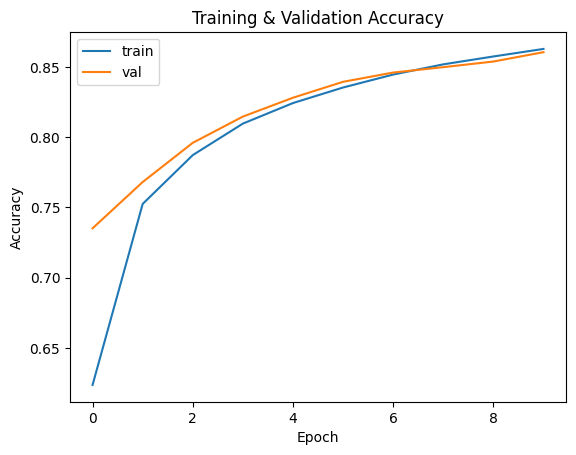

In [22]:
# Accuracy Vs Epoch plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Visualization of The CNNs Model Loss During Training

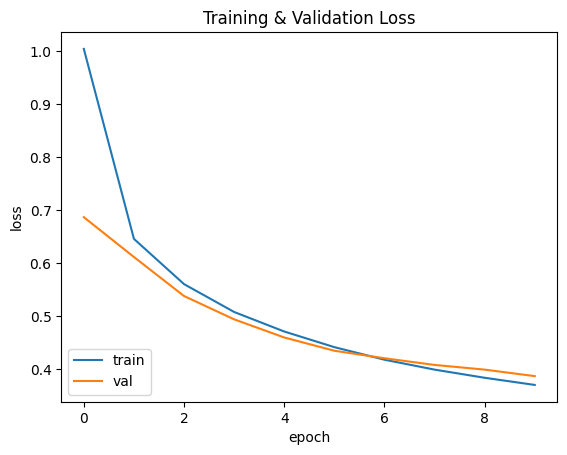

In [23]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

As can be seen from the above two charts,the training accuracy is similar to the validation accuracy and training loss is close. This means my CNN model generalizes well to unseen data sets . 

# Predictions On Unseen Data Sets

In [24]:
# Make predictions on ten images
predictions = model.predict(x_test[:10])

# Function to plot image and prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28,28)), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


## Plot first ten images

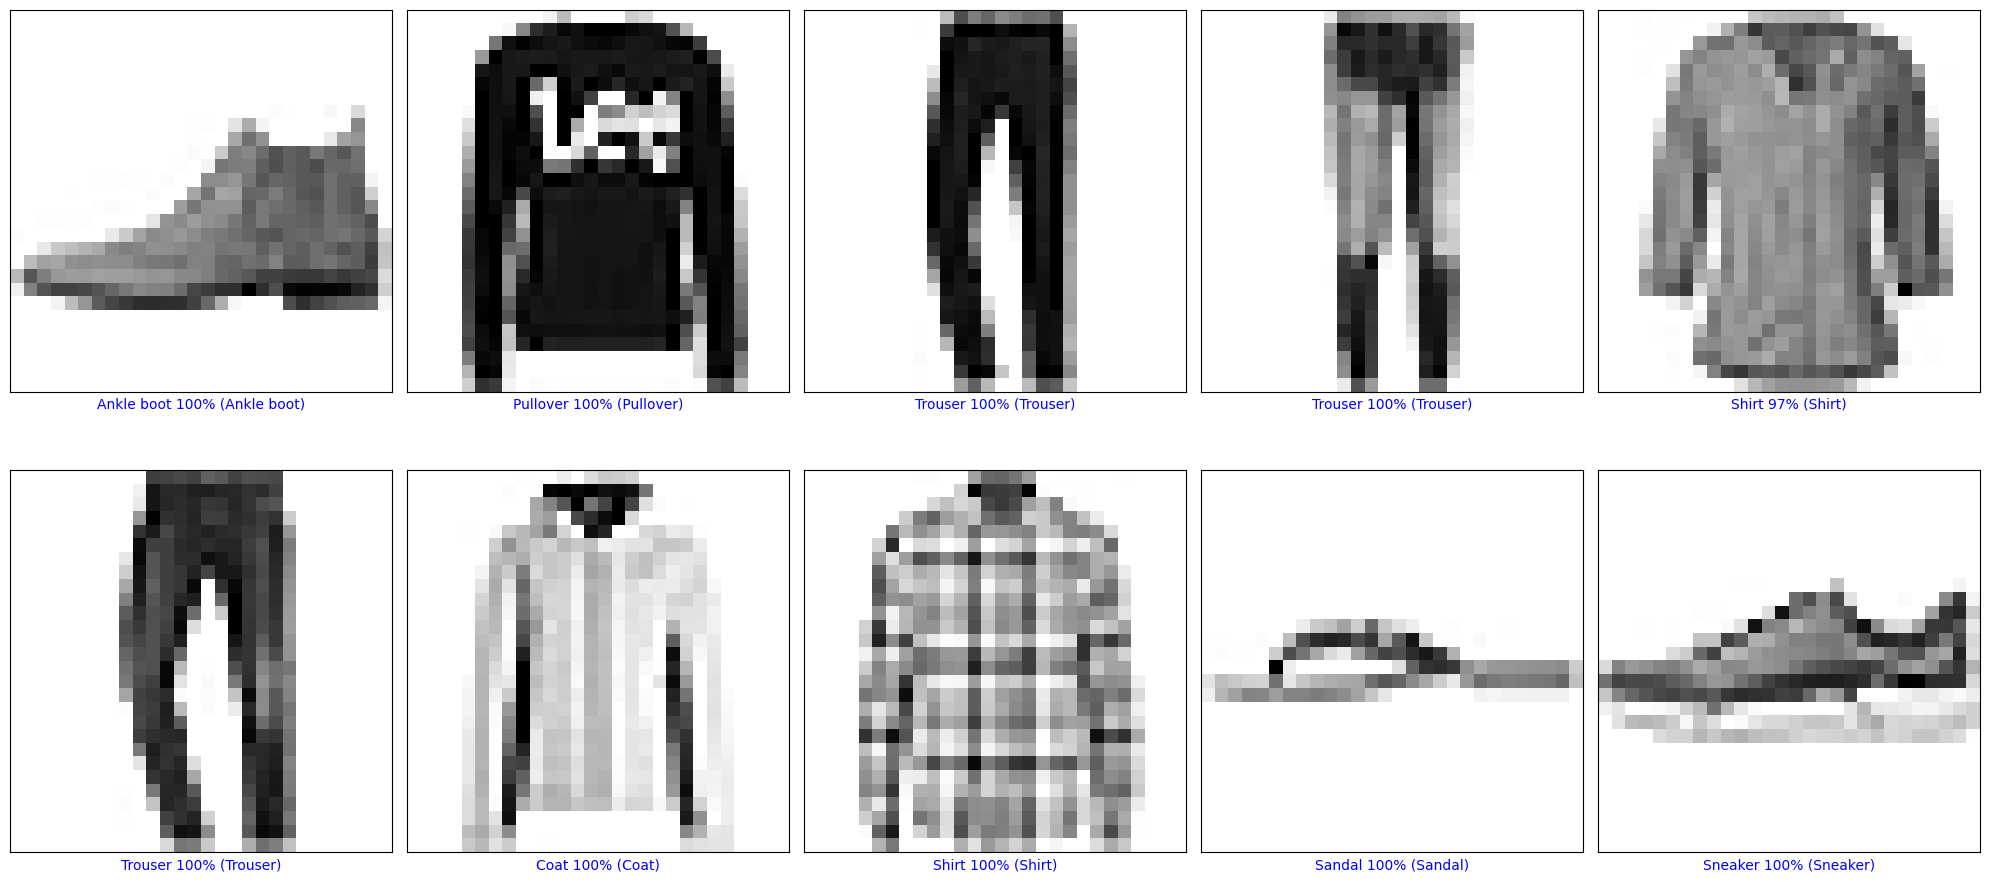

In [61]:
# Plot the first 10 test images, their predicted labels, and the true labels
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()

The results above show the model is able to predict different images pretty well.

# Discussion and learnings

We can examine other metrices to check the model's performance.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels

# Print the classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

From the results, we are able to examine the following metrics

1. Precision: Ratio of correctly precietde positive observations to the total predicted postives. We can see from the class "Trouser" the precison is 99%
2. Recall is the ratio of correctly predicted positive observations to all observations in the predicted class. For example the model had a 90% recall for dresses.
3. Finally, the F1-Score, or harmonic mean of the precision and recall provides a balances between the two other metrics. For Sandals we can see the recall is 95% providing and overall good performance in identify sandals


How can we improve the model's performance?

1. We can consider increasing the complexity of the CNN so that it can identify more complex features. To do this, we can add more convolutioal layers (which identify features)
2. DeepNets excel with more data as they automatically perform feature engineering, we can increase the number of images to drive performance
3. Train the DeepNet longer but include early stopping to prevent overfitting